In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['KaiTi'] #设置字体，能够正常显示中文
plt.rcParams['axes.unicode_minus']=False #正常显示图中负号

In [2]:
stock=pd.read_excel(r'DaPy.xlsx','Stock',index_col=0)
#读取数据，其中第二个参数表示的excel的表单名，第三个参数表示把第0列作为行索引
stock.info() #显示数据基本信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3180 entries, 2005-01-03 to 2017-12-29
Data columns (total 6 columns):
Open        3165 non-null float64
High        3165 non-null float64
Low         3165 non-null float64
Close       3165 non-null float64
Volume      3165 non-null float64
Adjusted    3165 non-null float64
dtypes: float64(6)
memory usage: 173.9 KB


In [5]:
stock.columns #获取列名

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted'], dtype='object')

In [6]:
stock=stock.dropna() #删除缺失值（数据中有25个缺失值）
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3165 entries, 2005-01-03 to 2017-12-29
Data columns (total 6 columns):
Open        3165 non-null float64
High        3165 non-null float64
Low         3165 non-null float64
Close       3165 non-null float64
Volume      3165 non-null float64
Adjusted    3165 non-null float64
dtypes: float64(6)
memory usage: 173.1 KB


In [7]:
round(stock.describe(),3)

,Open,High,Low,Close,Volume,Adjusted
count,3165.000,3165.000,3165.000,3165.000,3.165000e+03,3165.000
mean,9.223,9.415,9.048,9.231,7.176711e+07,8.908
std,4.218,4.311,4.124,4.216,9.336308e+07,4.097
min,0.695,0.706,0.680,0.696,0.000000e+00,0.604
25%,6.730,6.890,6.630,6.750,2.286934e+07,6.549
50%,10.344,10.544,10.150,10.350,4.017438e+07,9.960
75%,12.030,12.280,11.860,12.050,7.741391e+07,11.666
max,22.280,23.540,21.750,22.800,8.560013e+08,22.525


In [8]:
stock[['Close','Volume']].head()

,Close,Volume
date,,
2005-01-03,0.71296,0.0
2005-01-04,0.69599,10958717.0
2005-01-05,0.70525,6165072.0
2005-01-06,0.69676,9845971.0
2005-01-07,0.70201,13667162.0


In [12]:
stock['2015']['Close'].head()   #2015年度收盘数据的前五个

date
2015-01-05    9.36
2015-01-06    9.48
2015-01-07    9.34
2015-01-08    9.53
2015-01-09    9.37
Name: Close, dtype: float64

In [13]:
stock['2015-10'].Close #显示2015年10月的收盘价

date
2015-10-08    12.700000
2015-10-09    13.050000
2015-10-12    13.900000
2015-10-13    13.850000
2015-10-14    14.000000
2015-10-15    14.680000
2015-10-16    14.600000
2015-10-19    14.460000
2015-10-20    15.910000
2015-10-21    14.930000
2015-10-22    16.389999
2015-10-23    16.280001
2015-10-26    16.120001
2015-10-27    16.150000
2015-10-28    15.400000
2015-10-29    15.960000
2015-10-30    16.260000
Name: Close, dtype: float64

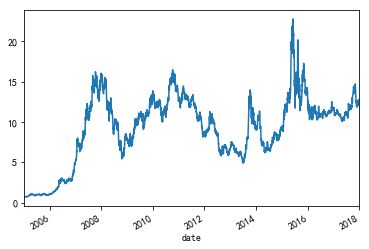

In [14]:
stock['Close'].plot() #年度趋势

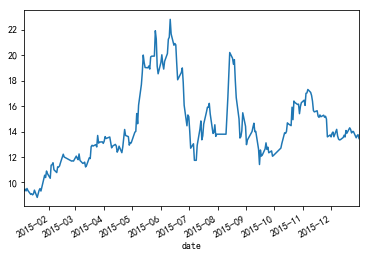

In [15]:
stock['2015']['Close'].plot() #按月趋势

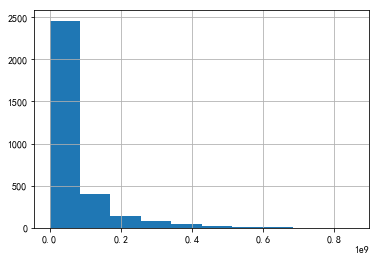

In [16]:
stock['Volume'].hist() #绘制成交量的直方图

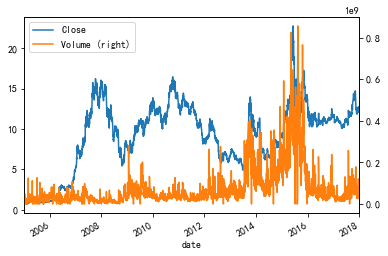

In [20]:
stock[['Close','Volume']].plot(secondary_y='Volume')   #新知识点

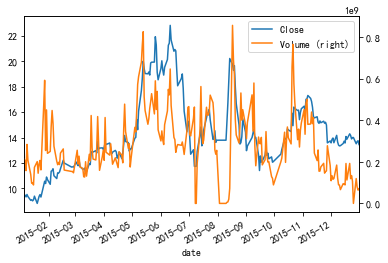

In [21]:
stock['2015'][['Close','Volume']].plot(secondary_y='Volume')

### 收盘价格预测

In [25]:
SC=stock['2015']['Close'] #2015年的收盘价格
SC.head()

date
2015-01-05    9.36
2015-01-06    9.48
2015-01-07    9.34
2015-01-08    9.53
2015-01-09    9.37
Name: Close, dtype: float64

In [26]:
SCM=pd.DataFrame(SC)

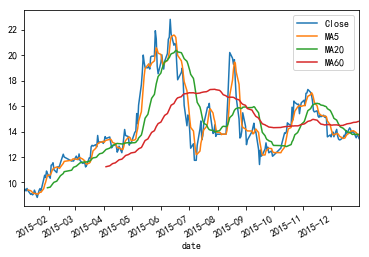

In [30]:
SCM['MA5']=SC.rolling(5).mean()
SCM['MA20']=SC.rolling(20).mean()
SCM['MA60']=SC.rolling(60).mean()
SCM.plot() #移动平均线

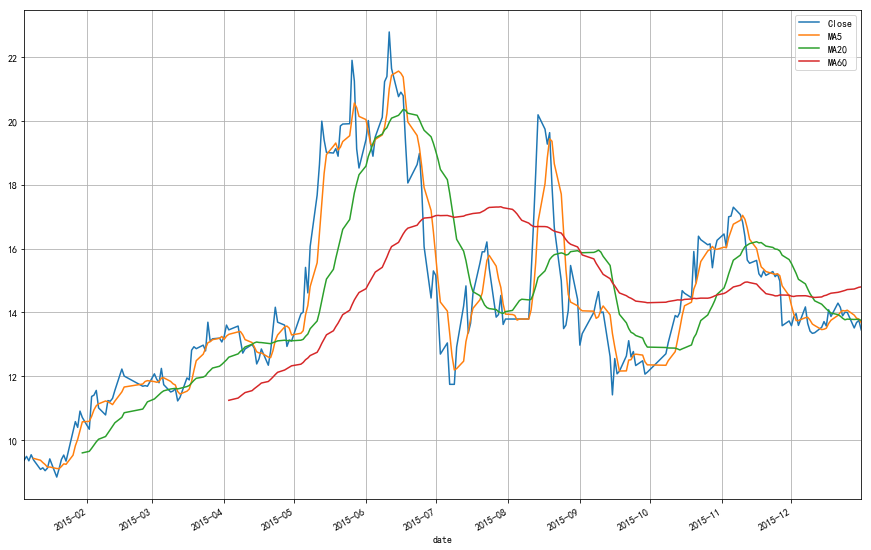

In [31]:
SCM.plot(subplots=False,figsize=(15,10),grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B61058EB70>,
      dtype=object)

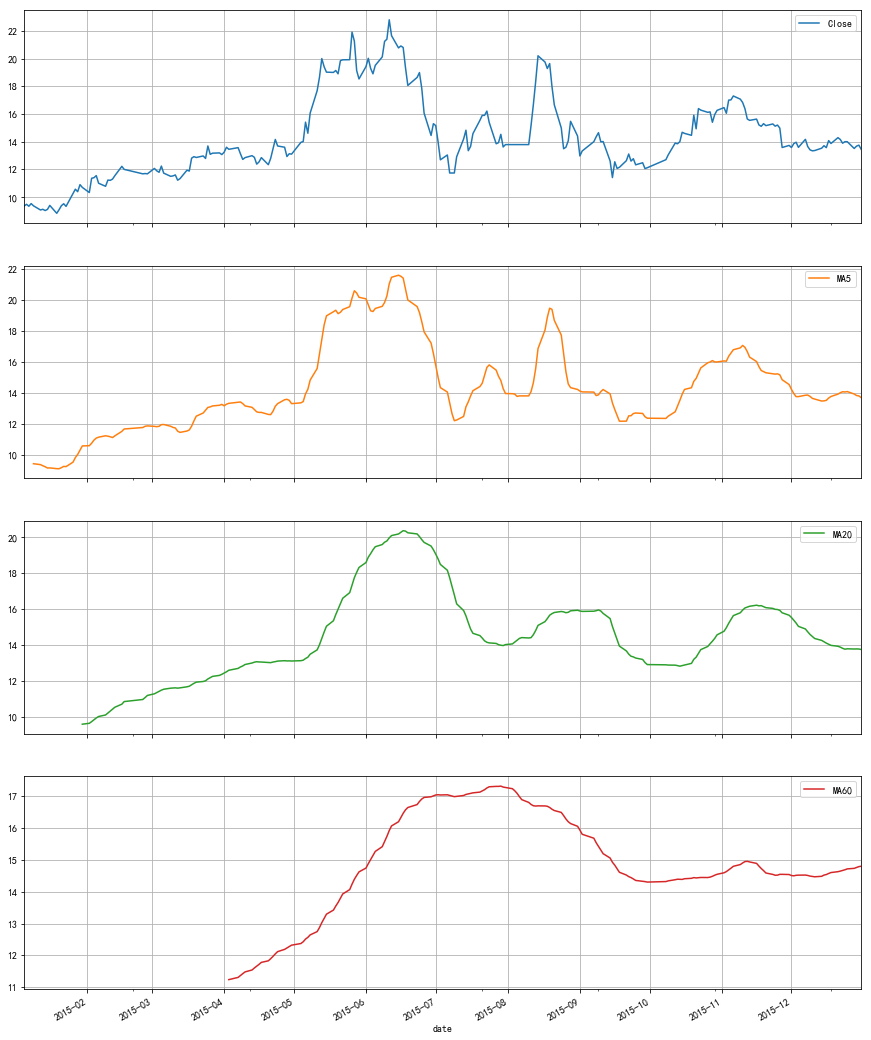

In [32]:
SCM.plot(subplots=True,figsize=(15,20),grid=True)

# 股票收益率分析
## 股票收益率=收益额/原始投资额

In [33]:
def Return(Yt): #计算收益率
    Rt=Yt/Yt.shift(1)-1
    return(Rt)
Sa=stock['2015']['Adjusted'] #2015年调整价格

In [34]:
Sa_R=Return(Sa)
Sa_R[1:11]

date
2015-01-06    0.012821
2015-01-07   -0.014768
2015-01-08    0.020343
2015-01-09   -0.016789
2015-01-12   -0.032017
2015-01-13    0.005513
2015-01-14   -0.009868
2015-01-15    0.008859
2015-01-16    0.031833
2015-01-19   -0.060638
Name: Adjusted, dtype: float64

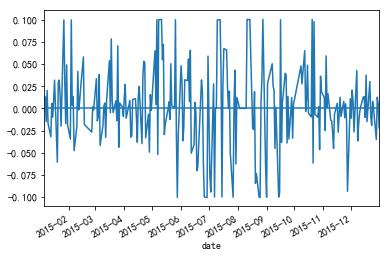

In [37]:
Sa_R.plot().axhline(y=0)

# 年度收益率计算

In [40]:
YR=pd.DataFrame({"Year":stock.index.year,"Adjusted":Return(stock['Adjusted'])})
YR[:10]

,Year,Adjusted
date,,
2005-01-03,2005,NaN
2005-01-04,2005,-0.023803
2005-01-05,2005,0.013305
2005-01-06,2005,-0.012038
2005-01-07,2005,0.007534
2005-01-10,2005,0.055171
2005-01-11,2005,0.000000
2005-01-12,2005,0.003754
2005-01-13,2005,-0.003739


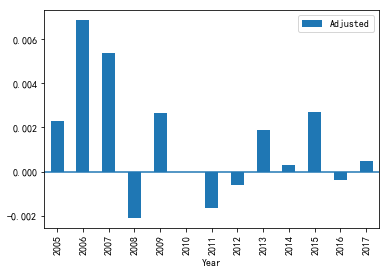

In [42]:
YRm=YR.groupby(['Year']).mean() #按年
YRm.plot(kind='bar').axhline(y=0) #axline(y=0) 表示在图上添上y=0这条直线

In [43]:
YMR=pd.DataFrame({'Year':stock.index.year,'Month':stock.index.month,'Adjusted':Return(stock['Adjusted'])})
YMR[:10]

,Year,Month,Adjusted
date,,,
2005-01-03,2005,1,NaN
2005-01-04,2005,1,-0.023803
2005-01-05,2005,1,0.013305
2005-01-06,2005,1,-0.012038
2005-01-07,2005,1,0.007534
2005-01-10,2005,1,0.055171
2005-01-11,2005,1,0.000000
2005-01-12,2005,1,0.003754
2005-01-13,2005,1,-0.003739


In [44]:
YMRm=YMR.groupby(['Year','Month']).mean() #按月
YMRm.head()

Adjusted
Year Month          
2005 1      0.002850
     2      0.003047
     3      0.006592
     4      0.005990
     5     -0.003878

In [47]:
round(YMRm.unstack(),4)

Adjusted                                                          \
Month       1       2       3       4       5       6       7       8    
Year                                                                     
2005    0.0028  0.0030  0.0066  0.0060 -0.0039  0.0061  0.0035 -0.0074   
2006   -0.0018  0.0125  0.0104  0.0075  0.0194  0.0045 -0.0038  0.0022   
2007    0.0208 -0.0101  0.0058  0.0099  0.0147 -0.0033  0.0054  0.0137   
2008   -0.0074  0.0055 -0.0072  0.0011 -0.0035 -0.0102  0.0046 -0.0051   
2009   -0.0083  0.0018  0.0056  0.0111 -0.0012  0.0048 -0.0014 -0.0045   
2010   -0.0063  0.0009  0.0009 -0.0053 -0.0012  0.0028  0.0047  0.0095   
2011   -0.0020  0.0083 -0.0040  0.0010 -0.0028  0.0026 -0.0014 -0.0019   
2012    0.0024  0.0017  0.0042  0.0010 -0.0024 -0.0043 -0.0118 -0.0023   
2013    0.0037 -0.0046 -0.0016 -0.0044  0.0034 -0.0128  0.0058  0.0165   
2014    0.0069 -0.0060 -0.0131 -0.0044  0.0046 -0.0025  0.0034  0.0026   
2015    0.0093  0.0065  0.0056  0.0005  0.0192 -0.0077 -0.0026  0.0042   
2016   -0.0106 -0.0016  0.0050 -0.0011 -0.0002 -0.0005 -0.0013  0.0023   
2017   -0.0018  0.0013 -0.0021 -0.0036  0.0025  0.0031  0.0030  0.0002   

                                       
Month      9       10      11      12  
Year                                   
2005   0.0067 -0.0010 -0.0015  0.0070  
2006   0.0031 -0.0022  0.0161  0.0131  
2007  -0.0012 -0.0000 -0.0077  0.0124  
2008  -0.0061 -0.0115  0.0159 -0.0003  
2009   0.0077 -0.0007  0.0086  0.0041  
2010   0.0029 -0.0022 -0.0045 -0.0022  
2011  -0.0060  0.0023 -0.0076 -0.0031  
2012   0.0077 -0.0014 -0.0061  0.0061  
2013   0.0265 -0.0088  0.0019 -0.0082  
2014   0.0073 -0.0019  0.0011  0.0037  
2015  -0.0073  0.0183 -0.0076 -0.0007  
2016  -0.0011  0.0021  0.0019 -0.0007  
2017   0.0048  0.0060 -0.0084  0.0016

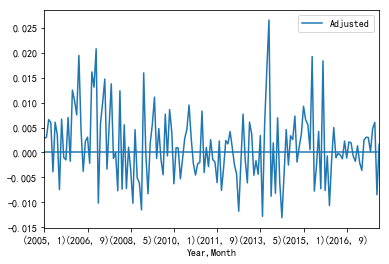

In [48]:
YMRm.plot().axhline(y=0)

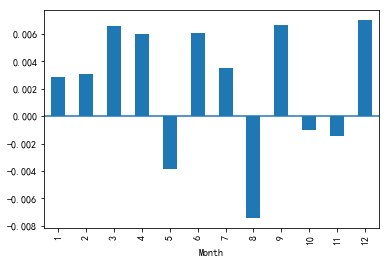

In [49]:
MRm=YMR['2005'].groupby(['Month']).mean() #具体一年按月分
MRm['Adjusted'].plot(kind='bar').axhline(y=0)